<a href="https://colab.research.google.com/github/ahlexn/DATA3402.Spring.2024/blob/main/Copy_of_Lab_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 7- Data Analysis

Exercises 1-4 are to be completed by Match 29th. The remaider of the lab is due April 5th. Before leaving lab today, everyone must download the dataset.

## Exercise 1: Reading

### HiggsML
In 2014, some of my colleagues from the ATLAS experiment put together a Higgs Machine Learning Challenge, which was hosted on [Kaggle](https://www.kaggle.com). Please read sections 1 and 3 (skip/skim 2) of [The HiggsML Technical Documentation](https://higgsml.lal.in2p3.fr/files/2014/04/documentation_v1.8.pdf).

Kaggle is a platform for data science competitions, with cash awards for winners. Kaggle currently hosts over 50,000 public datasets and associated competitions. Later in the course we will look at a variety of problems hosted on Kaggle and similar platforms.

### SUSY Dataset

For the next few labs we will use datasets used in the [first paper on Deep Learning in High Energy physics](https://arxiv.org/pdf/1402.4735.pdf). Please read up to the "Deep Learning" section (end of page 5). This paper demonstrates that Deep Neural Networks can learn from raw data the features that are typically used by physicists for searches for exotics particles. The authors provide the data they used for this paper. They considered two benchmark scenarios: Higgs and SUSY.

## Exercise 2: Download SUSY Dataset

The information about the dataset can be found at the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). We'll start with the [SUSY Dataset](https://archive.ics.uci.edu/ml/datasets/SUSY).

### Download
In a terminal, download the data directly from the source and then decompress it. For example:

* To download:
    * On Mac OS:
    `curl http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz > SUSY.csv.gz`

    * In linux:
    `wget http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz`

* To uncompress:
`gunzip SUSY.csv.gz`

In [ ]:
!curl http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz > SUSY.csv.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  879M    0  879M    0     0  3096k      0 --:--:--  0:04:50 --:--:-- 1425k


In [ ]:
!gunzip SUSY.csv.gz

In [ ]:
ls -lh

total 2.3G
drwxr-xr-x 1 root root 4.0K Apr  4 13:24 sample_data/
-rw-r--r-- 1 root root 2.3G Apr  8 06:03 SUSY.csv


The data is provided as a comma separated file.

In [ ]:
filename="SUSY.csv"
# print out the first 5 lines using unix head command
!head -5  "SUSY.csv"

0.000000000000000000e+00,9.728614687919616699e-01,6.538545489311218262e-01,1.176224589347839355e+00,1.157156467437744141e+00,-1.739873170852661133e+00,-8.743090629577636719e-01,5.677649974822998047e-01,-1.750000417232513428e-01,8.100607395172119141e-01,-2.525521218776702881e-01,1.921887040138244629e+00,8.896374106407165527e-01,4.107718467712402344e-01,1.145620822906494141e+00,1.932632088661193848e+00,9.944640994071960449e-01,1.367815494537353516e+00,4.071449860930442810e-02
1.000000000000000000e+00,1.667973041534423828e+00,6.419061869382858276e-02,-1.225171446800231934e+00,5.061022043228149414e-01,-3.389389812946319580e-01,1.672542810440063477e+00,3.475464344024658203e+00,-1.219136357307434082e+00,1.295456290245056152e-02,3.775173664093017578e+00,1.045977115631103516e+00,5.680512785911560059e-01,4.819284379482269287e-01,0.000000000000000000e+00,4.484102725982666016e-01,2.053557634353637695e-01,1.321893453598022461e+00,3.775840103626251221e-01
1.000000000000000000e+00,4.4483992457389831

## Reducing the dataset

This is a rather large dataset. If you have trouble loading it, we can easily make a new file with less data.

Here we look at the size of the data

In [ ]:
!ls -lh

total 2.3G
drwxr-xr-x 1 root root 4.0K Apr  4 13:24 sample_data
-rw-r--r-- 1 root root 2.3G Apr  8 06:03 SUSY.csv


We see that we have 5 million datapoints.

In [ ]:
!wc -l SUSY.csv

5000000 SUSY.csv


We create a new file of the first half million. This is sufficient for our needs in this lab:

In [ ]:
!head -500000 SUSY.csv > SUSY-small.csv

In [ ]:
ls -lh

total 2.5G
drwxr-xr-x 1 root root 4.0K Apr  4 13:24 sample_data/
-rw-r--r-- 1 root root 2.3G Apr  8 06:03 SUSY.csv
-rw-r--r-- 1 root root 228M Apr  8 06:11 SUSY-small.csv


In [ ]:
! wc -l SUSY-small.csv

500000 SUSY-small.csv


Use this file for the rest of the lab to make this run faster.

### First Look

Each row represents a LHC collision event. Each column contains some observable from that event. The variable names are ([based on documentation](https://archive.ics.uci.edu/ml/datasets/SUSY)):

In [ ]:
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]

Some of these variables represent the "raw" kinematics of the observed final state particles, while others are "features" that are derived from these raw quantities:

In [ ]:
RawNames=["l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi"]
FeatureNames=list(set(VarNames[1:]).difference(RawNames))

In [ ]:
RawNames

['l_1_pT',
 'l_1_eta',
 'l_1_phi',
 'l_2_pT',
 'l_2_eta',
 'l_2_phi',
 'MET',
 'MET_phi']

In [ ]:
FeatureNames

['MET_rel',
 'M_TR_2',
 'cos_theta_r1',
 'R',
 'axial_MET',
 'dPhi_r_b',
 'MT2',
 'M_Delta_R',
 'S_R',
 'M_R']

We will use pandas to read in the file, and matplotlib to make plots. The following ensures pandas is installed and sets everything up:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Now we can read the data into a pandas dataframe:

In [ ]:
filename = "SUSY.csv"
df = pd.read_csv(filename, dtype='float64', names=VarNames)

You can see the data in Jupyter by just evaluateing the dataframe:

In [ ]:
df

,signal,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
0,0.0,0.972861,0.653855,1.176225,1.157156,-1.739873,-0.874309,0.567765,-0.175000,0.810061,-0.252552,1.921887,0.889637,0.410772,1.145621,1.932632,0.994464,1.367815,0.040714
1,1.0,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
2,1.0,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535,2.024308,0.603498,1.562374,1.135454,0.180910
3,1.0,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041,3.046260,-1.005285,0.569386,1.015211,1.582217,1.551914,0.761215,1.715464,1.492257,0.090719
4,1.0,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742,0.589204,1.365479,1.179295,0.968218,0.728563,0.000000,1.083158,0.043429,1.154854,0.094859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999995,1.0,0.853325,-0.961783,-1.487277,0.678190,0.493580,1.647969,1.843867,0.276954,1.025105,-1.486535,0.892879,1.684429,1.674084,3.366298,1.046707,2.646649,1.389226,0.364599
4999996,0.0,0.951581,0.139370,1.436884,0.880440,-0.351948,-0.740852,0.290863,-0.732360,0.001360,0.257738,0.802871,0.545319,0.602730,0.002998,0.748959,0.401166,0.443471,0.239953
4999997,0.0,0.840389,1.419162,-1.218766,1.195631,1.695645,0.663756,0.490888,-0.509186,0.704289,0.045744,0.825015,0.723530,0.778236,0.752942,0.838953,0.614048,1.210595,0.026692
4999998,1.0,1.784218,-0.833565,-0.560091,0.953342,-0.688969,-1.428233,2.660703,-0.861344,2.116892,2.906151,1.232334,0.952444,0.685846,0.000000,0.781874,0.676003,1.197807,0.093689


The first column stores the "truth" label of whether an event was signal or not. Pandas makes it easy to create dataframes that store only the signal or background events:

In [ ]:
df_sig=df[df.signal==1]
df_bkg=df[df.signal==0]

The following example plots the signal and background distributions of every variable. Note that we use VarNames[1:] to skip the first variable, which was the true label.

l_1_pT


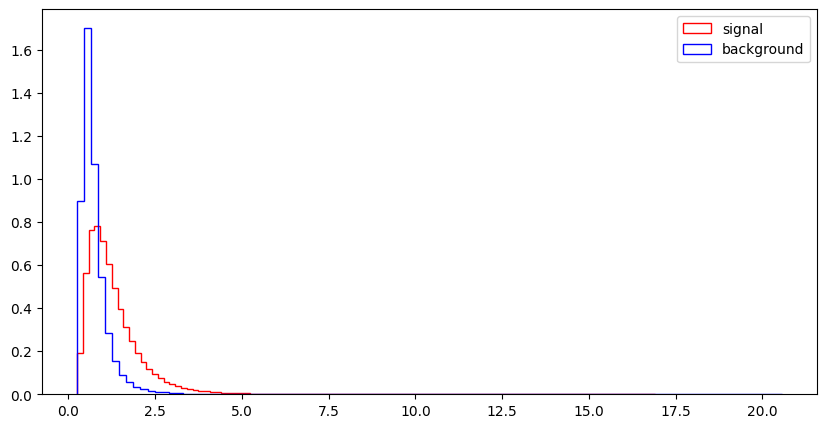

l_1_eta


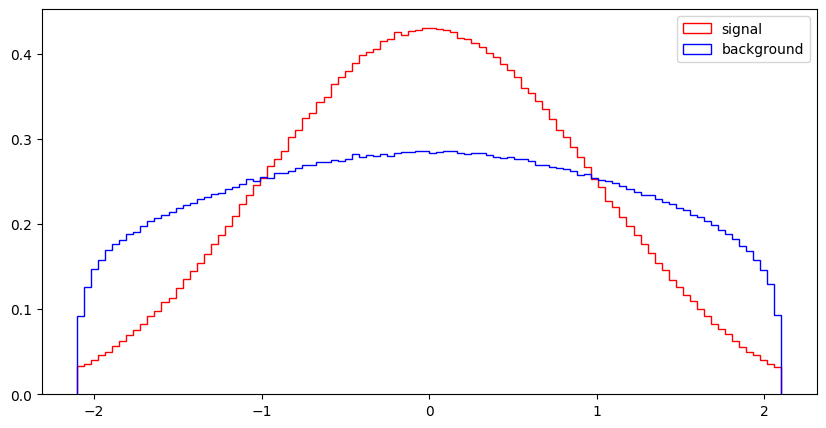

l_1_phi


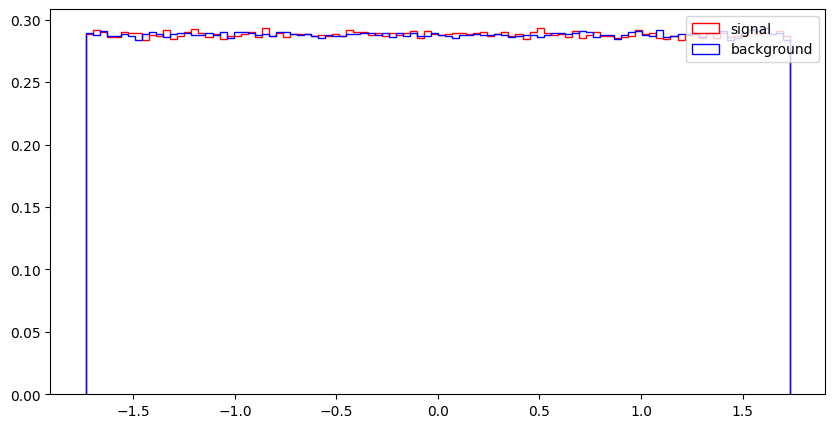

l_2_pT


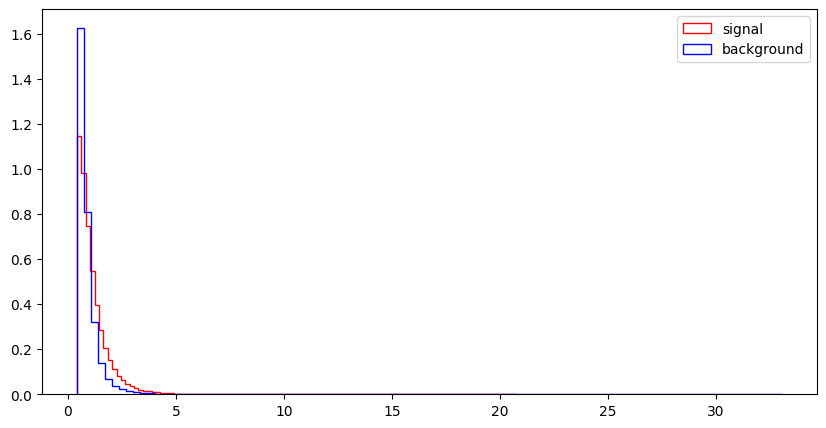

l_2_eta


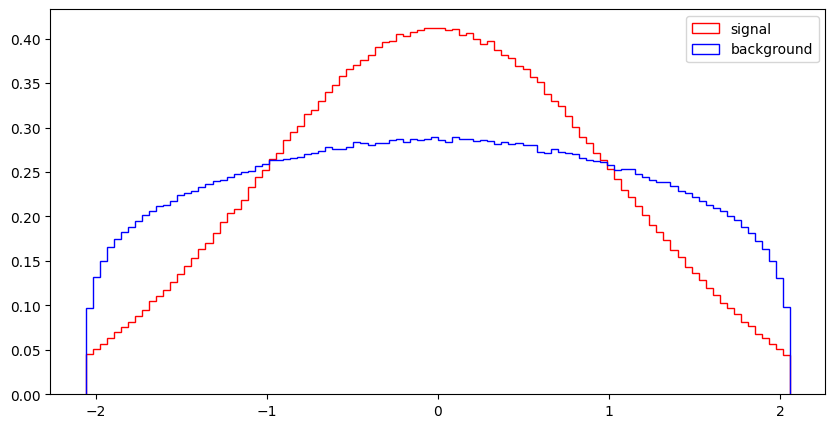

l_2_phi


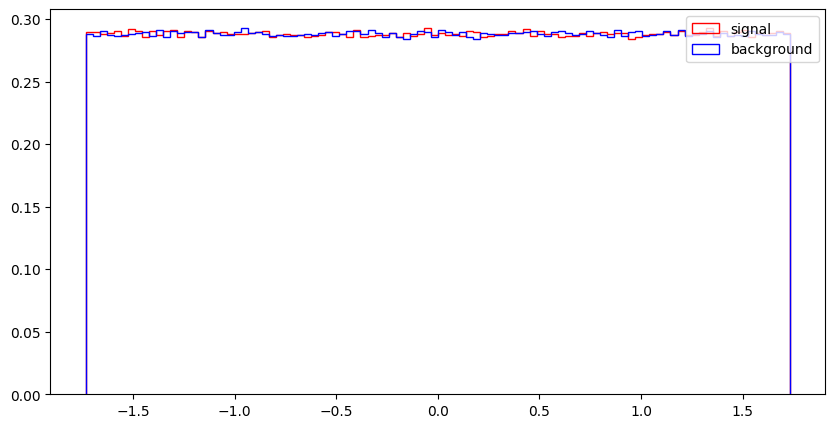

MET


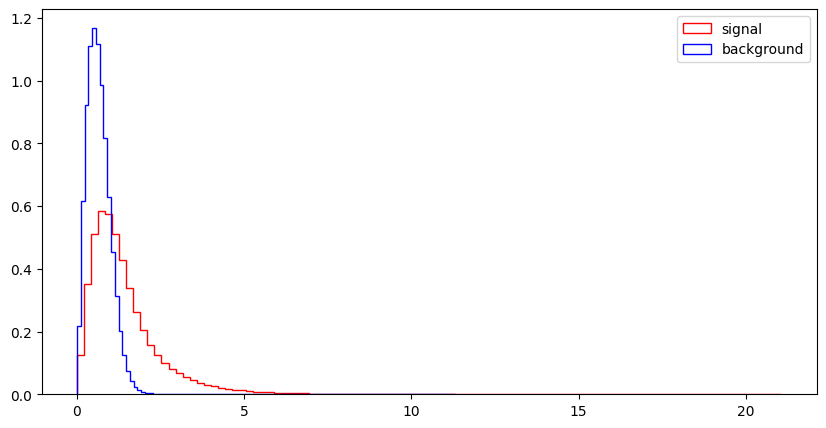

MET_phi


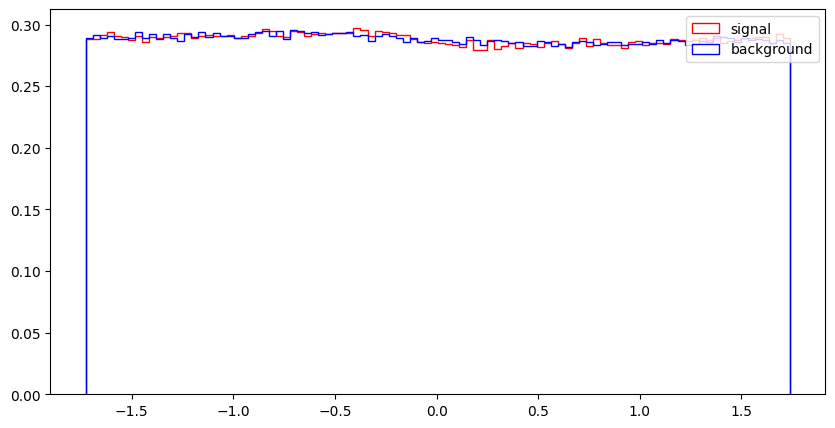

MET_rel


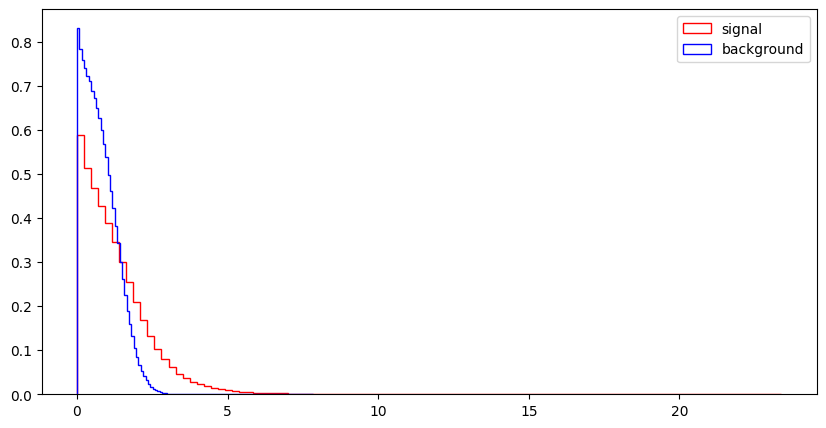

axial_MET


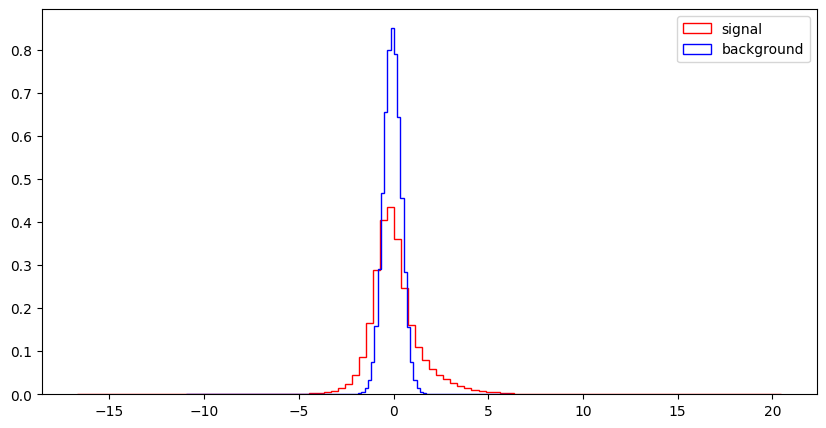

M_R


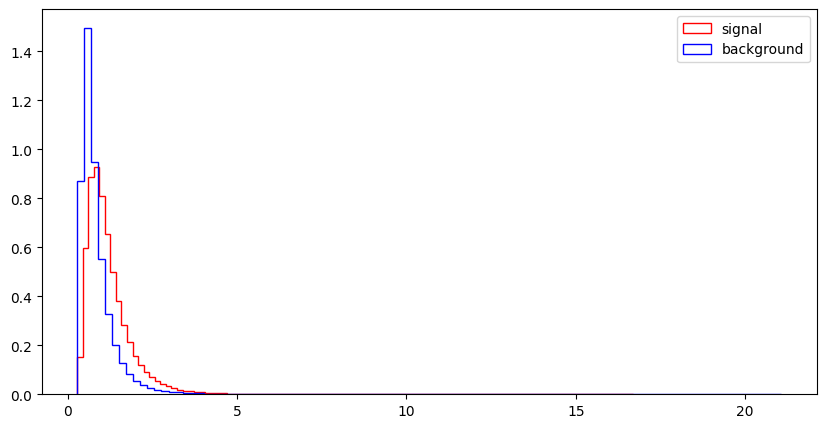

M_TR_2


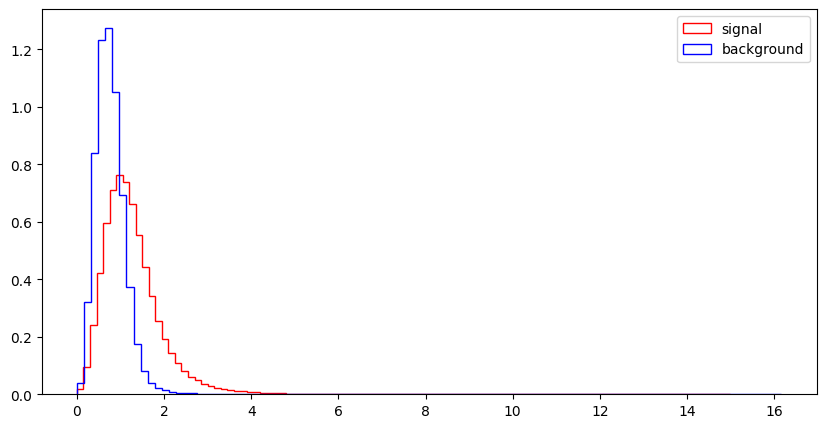

R


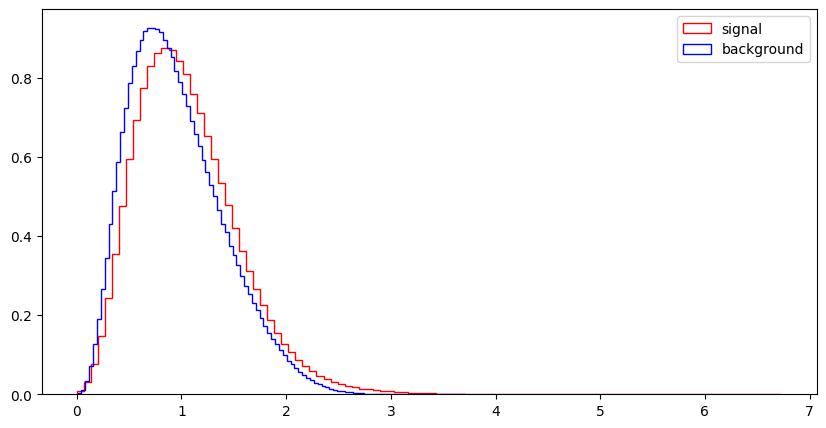

MT2


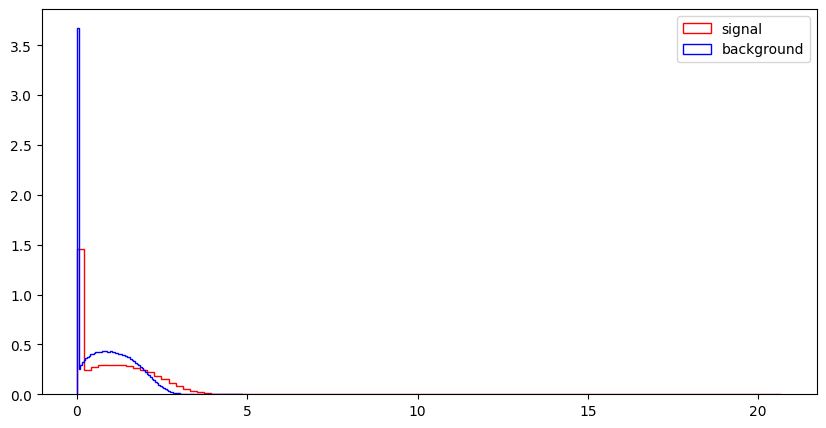

S_R


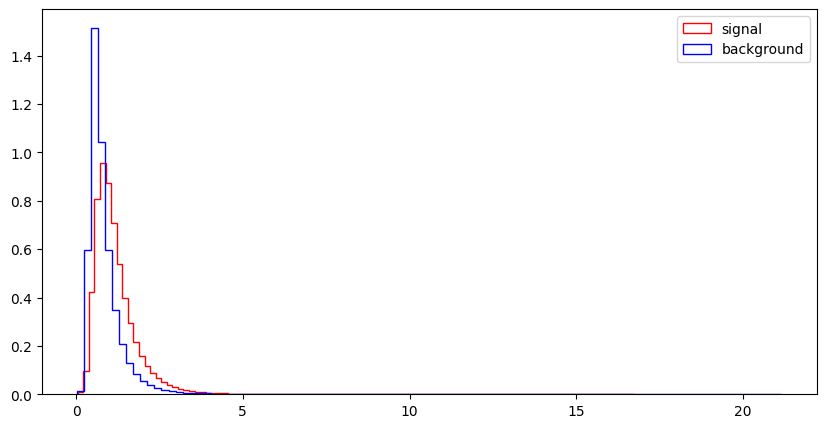

M_Delta_R


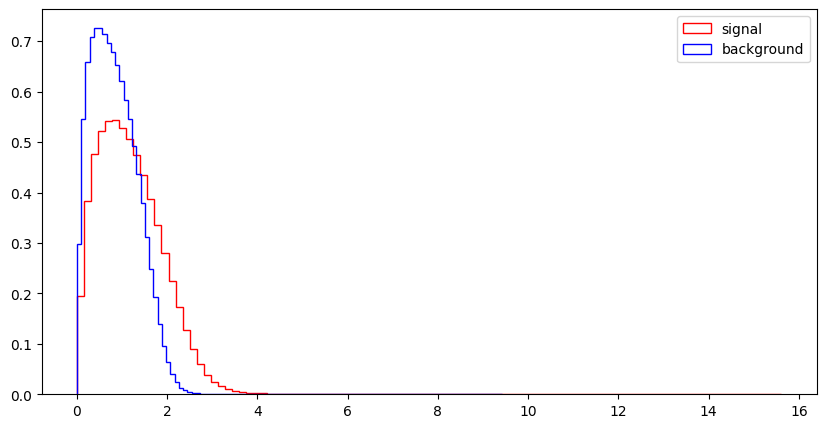

dPhi_r_b


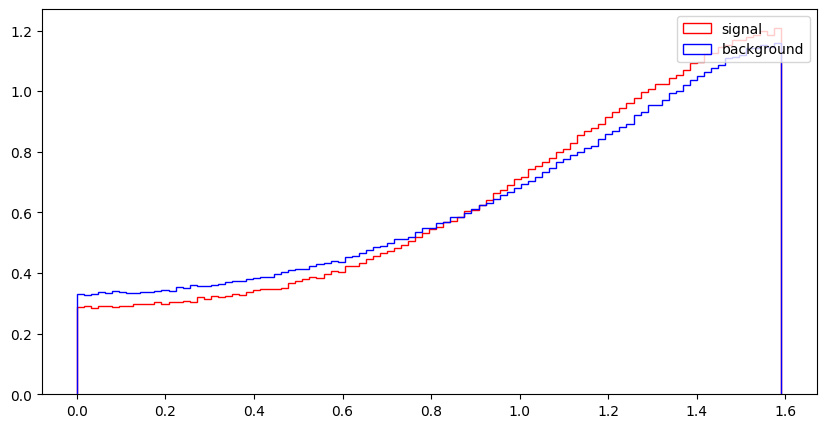

cos_theta_r1


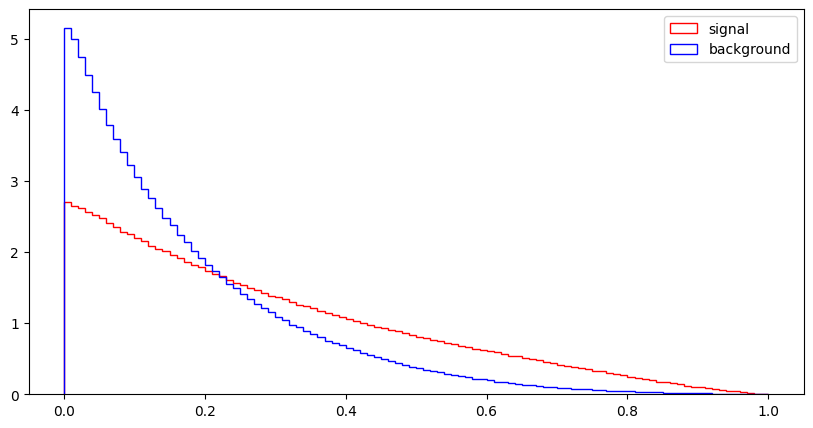

In [ ]:
import numpy as np
for var in VarNames[1:]:
    print (var)
    plt.figure(figsize=(10,5))
    plt.hist(np.array(df_sig[var]),bins=100,histtype="step", color="red",label="signal",density=1, stacked=True)
    plt.hist(np.array(df_bkg[var]),bins=100,histtype="step", color="blue", label="background",density=1, stacked=True)
    plt.legend(loc='upper right')
    plt.show()

## Exercise 3: Make nice figures

Now use `matplotlib` to reproduce as closely as you can figures 5 and 6 from the paper. This exercise is intended to get you to familiarize yourself with making nicely formatted `matplotlib` figures with multiple plots. Note that the plots in the paper are actually wrong!

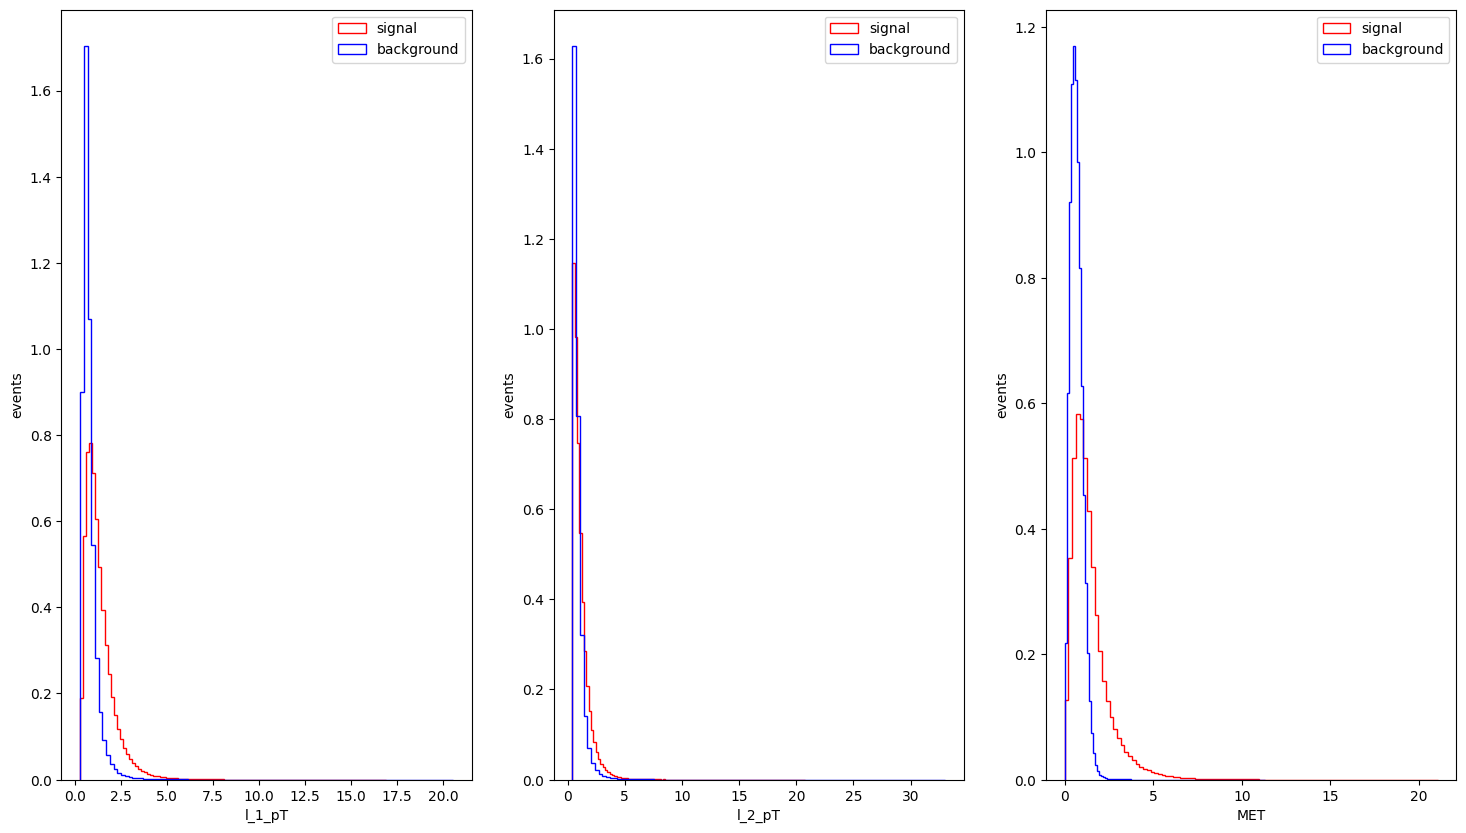

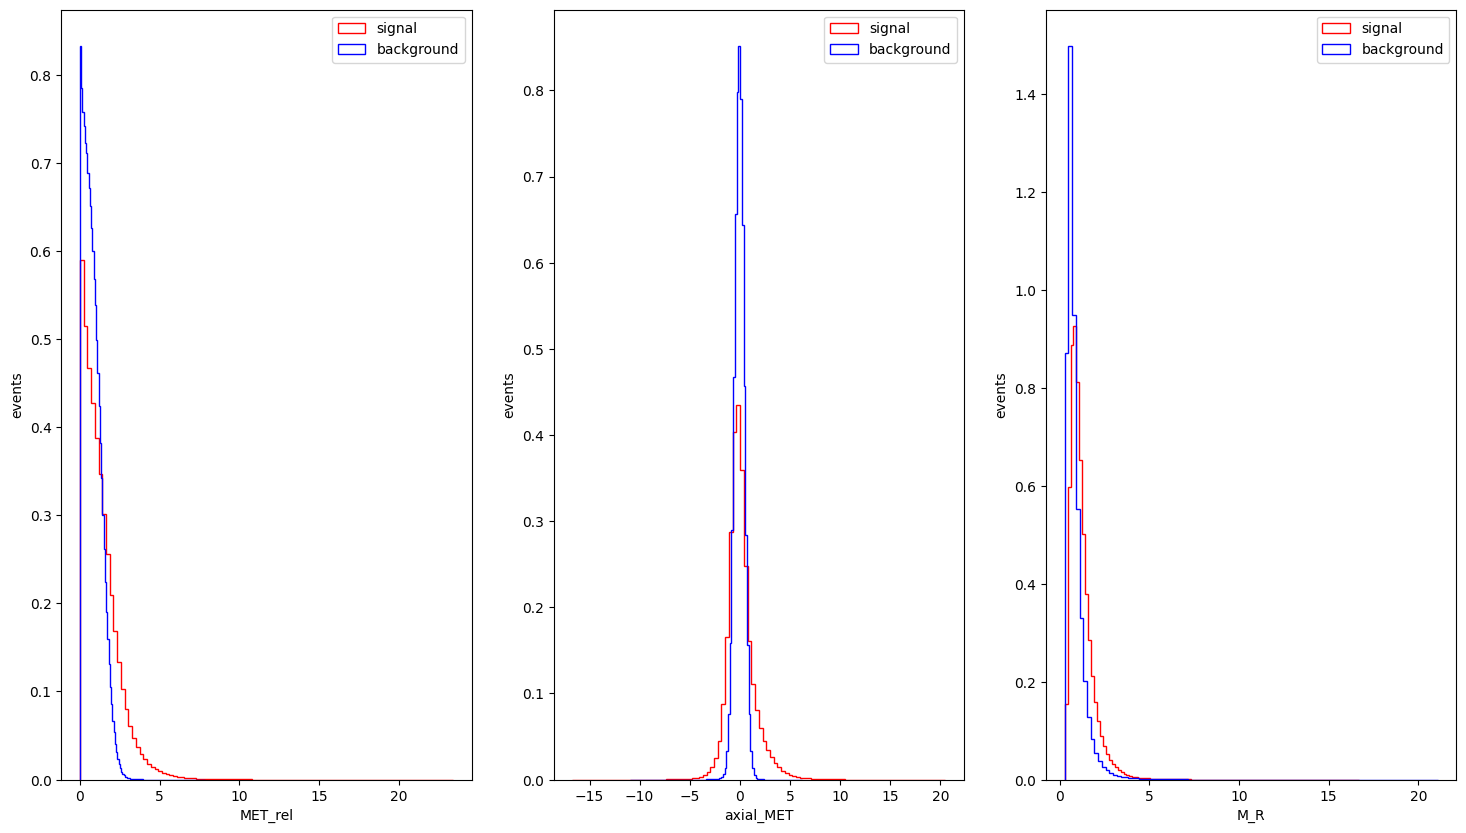

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
#figure 5
df_sig=df[df.signal==1]
df_bkg=df[df.signal==0]
varlist=["l_1_pT", "l_2_pT", "MET"]
fig=plt.figure(figsize=(18,10))
for i in range(len(varlist)):
  var=varlist[i]
  ax=fig.add_subplot(1,3,i+1)
  ax.hist(np.array(df_sig[var]),bins=100,histtype="step", color="red",label="signal",density=1, stacked=True)
  ax.hist(np.array(df_bkg[var]),bins=100,histtype="step", color="blue", label="background",density=1, stacked=True)
  ax.set_xlabel(var)
  ax.set_ylabel("events")
  ax.legend(loc='upper right')
plt.show()

#figure 6
varlist=["MET_rel","axial_MET","M_R"]
fig=plt.figure(figsize=(18,10))
for i in range(len(varlist)):
  var=varlist[i]
  ax=fig.add_subplot(1,3,i+1)
  ax.hist(np.array(df_sig[var]),bins=100,histtype="step", color="red",label="signal",density=1, stacked=True)
  ax.hist(np.array(df_bkg[var]),bins=100,histtype="step", color="blue", label="background",density=1, stacked=True)
  ax.set_xlabel(var)
  ax.set_ylabel("events")
  ax.legend(loc='upper right')
plt.show()


## Exercise 4: Correlation

### Exercise 4.1

#### Part a
Write a function that creates pair plots and use it to compare variables in the SUSY sample, separately for low and high-level features. Refer to Lecture 13 for details. Do not use `seaborn`.

#### Part b
Making these plots can be slow because creating each plot initiates a full loop over the data. Make at least one modification to your function in part a to speed it up. Can you propose a different method of creating histograms that would speed up making such pair plots?

#### Part c
Which observables appear to be best for separating signal from background?

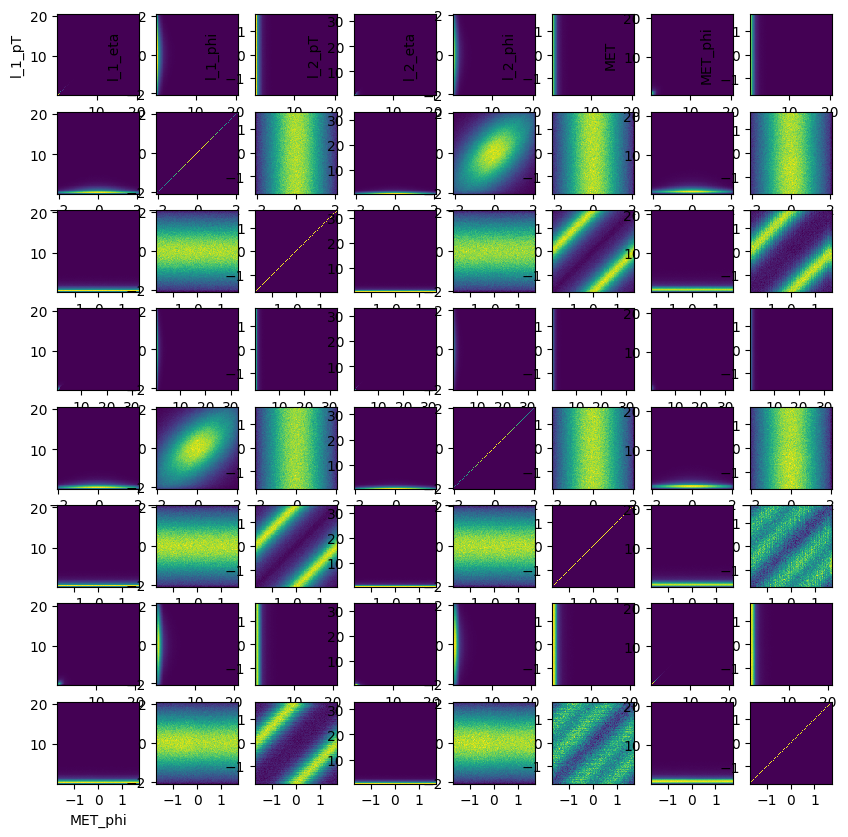

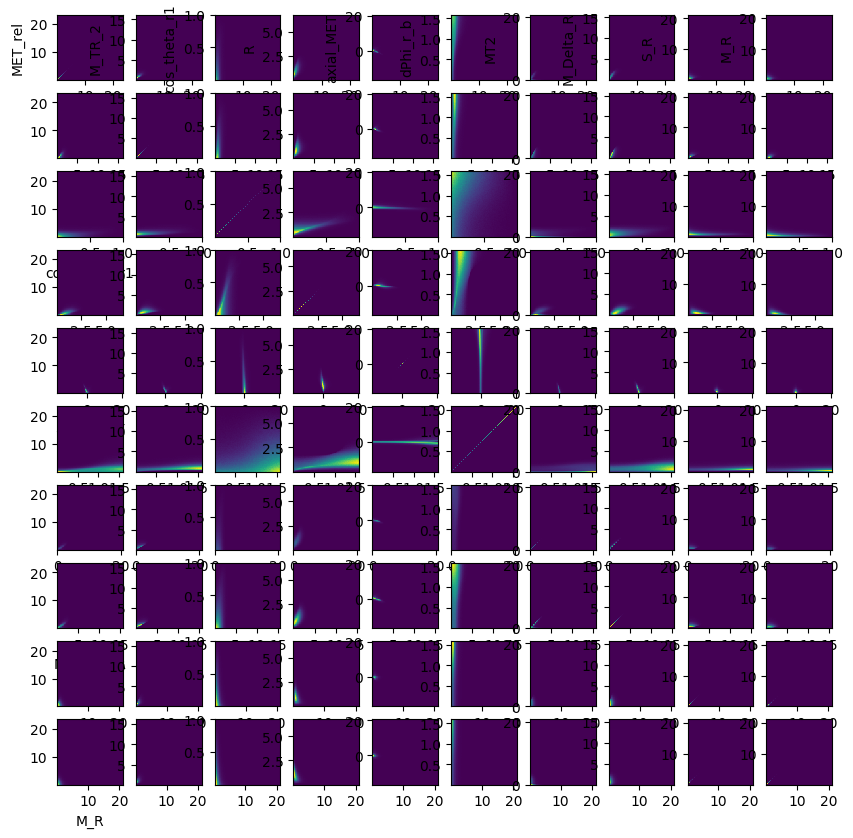

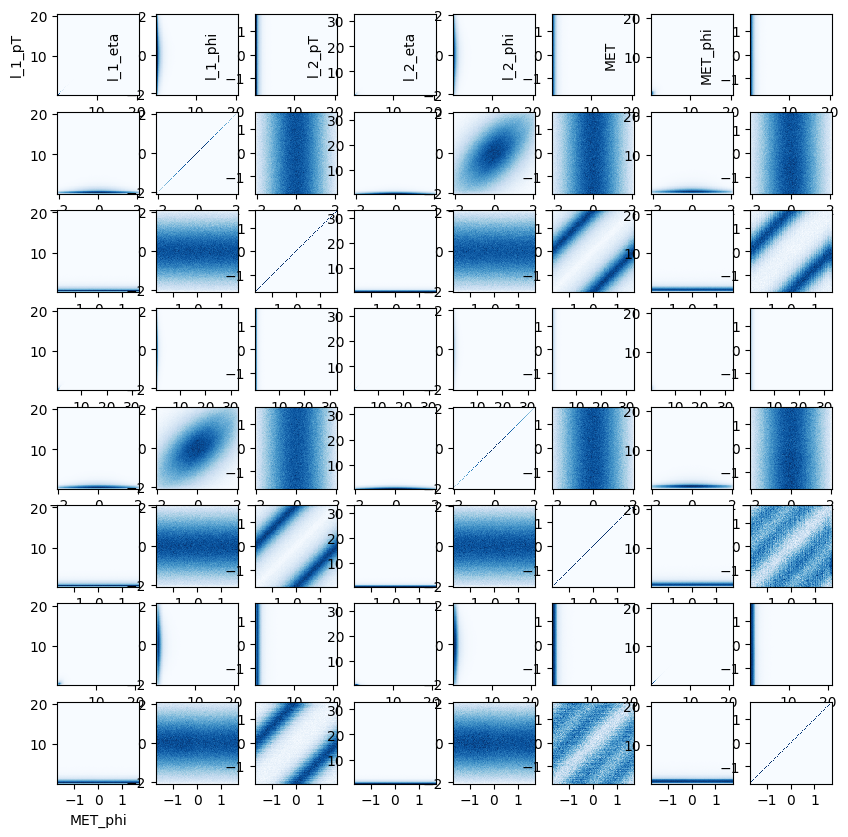

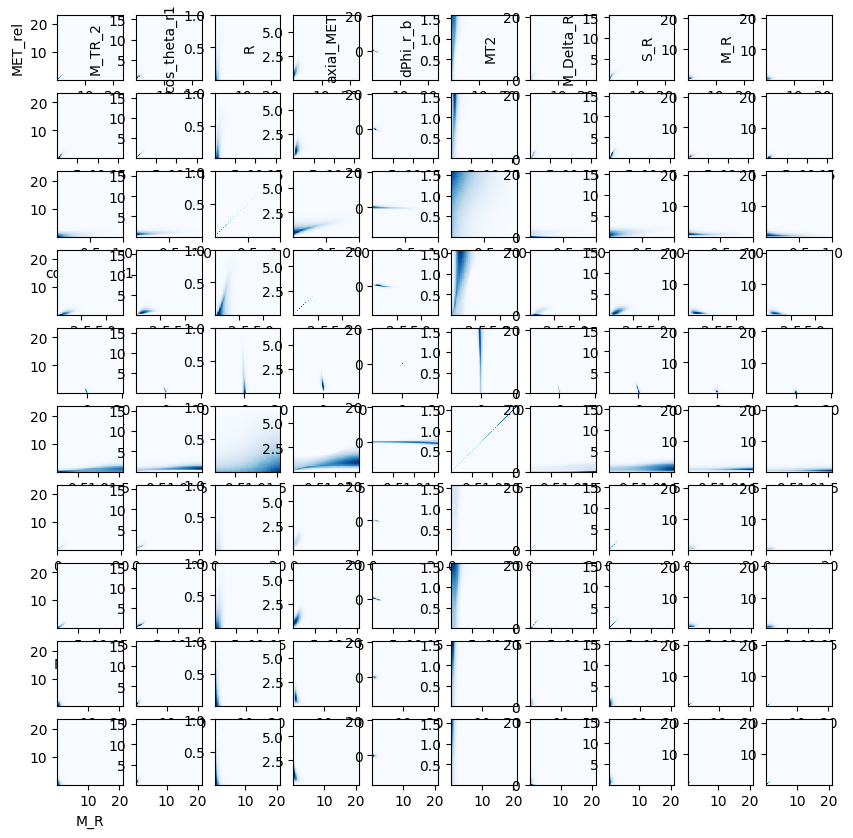

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
#part a
def pairplot(df, varlist, figsize=(10,10)):
  fig=plt.figure(figsize=figsize)
  for i in range(len(varlist)):
    for j in range(len(varlist)):
      ax=fig.add_subplot(len(varlist),len(varlist),i*len(varlist)+j+1)
      ax.hist2d(np.array(df[varlist[i]]),np.array(df[varlist[j]]),bins=100)
      if i==0:
        ax.set_ylabel(varlist[j])
      if j==0:
        ax.set_xlabel(varlist[i])
  plt.show()

pairplot(df,RawNames)
pairplot(df,FeatureNames)

#part b
def pairplot_fast(df, varlist, figsize=(10,10)):
  fig=plt.figure(figsize=figsize)
  for i in range(len(varlist)):
    for j in range(len(varlist)):
      ax=fig.add_subplot(len(varlist),len(varlist),i*len(varlist)+j+1)
      hist, xedges, yedges = np.histogram2d(np.array(df[varlist[i]]),np.array(df[varlist[j]]),bins=100)
      ax.pcolormesh(xedges, yedges, hist.T, cmap='Blues')
      if i==0:
        ax.set_ylabel(varlist[j])
      if j==0:
        ax.set_xlabel(varlist[i])
  plt.show()

pairplot_fast(df,RawNames)
pairplot_fast(df,FeatureNames)

# Part c
# The observables that appear to be best for separating signal from background are:
# * MET
# * MET_rel
# * axial_MET
# * M_R
# * M_TR_2
# * R
# * MT2
# * S_R
# * M_Delta_R
# * dPhi_r_b
# * cos_theta_r1


### Exercise 4.2

#### Part a
Install [tabulate](https://github.com/astanin/python-tabulate).

#### Part b
Use numpy to compute the [covariance matrix](https://numpy.org/doc/stable/reference/generated/numpy.cov.html) and [correlation matrix](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html) between all observabes, and separately between low and high-level features.

#### Part c
Use tabulate to create a well formatted table of the covariance and correlation matrices, with nice headings and appropriate significant figures. Embed the table into this notebook.

#### Part d
Write a function that takes a dataset and appropriate arguments and performs steps b and c.  

In [ ]:
import numpy as np
!pip install tabulate
import tabulate

#part b
cov_all = np.cov(df.T)
corr_all = np.corrcoef(df.T)
cov_raw = np.cov(df[RawNames].T)
corr_raw = np.corrcoef(df[RawNames].T)
cov_feat = np.cov(df[FeatureNames].T)
corr_feat = np.corrcoef(df[FeatureNames].T)

#part c
print("Covariance Matrix (All Variables)")
print(tabulate.tabulate(cov_all, headers=VarNames, tablefmt="fancy_grid"))
print("\nCorrelation Matrix (All Variables)")
print(tabulate.tabulate(corr_all, headers=VarNames, tablefmt="fancy_grid"))
print("\nCovariance Matrix (Raw Variables)")
print(tabulate.tabulate(cov_raw, headers=RawNames, tablefmt="fancy_grid"))
print("\nCorrelation Matrix (Raw Variables)")
print(tabulate.tabulate(corr_raw, headers=RawNames, tablefmt="fancy_grid"))
print("\nCovariance Matrix (Feature Variables)")
print(tabulate.tabulate(cov_feat, headers=FeatureNames, tablefmt="fancy_grid"))
print("\nCorrelation Matrix (Feature Variables)")
print(tabulate.tabulate(corr_feat, headers=FeatureNames, tablefmt="fancy_grid"))

#part d
def compute_cov_corr(df, varlist):
  cov = np.cov(df[varlist].T)
  corr = np.corrcoef(df[varlist].T)
  print("Covariance Matrix")
  print(tabulate.tabulate(cov, headers=varlist, tablefmt="fancy_grid"))
  print("\nCorrelation Matrix")
  print(tabulate.tabulate(corr, headers=varlist, tablefmt="fancy_grid"))

compute_cov_corr(df, VarNames)
compute_cov_corr(df, RawNames)
compute_cov_corr(df, FeatureNames)


Covariance Matrix (All Variables)
╒══════════════╤══════════════╤══════════════╤══════════════╤══════════════╤══════════════╤══════════════╤══════════════╤══════════════╤══════════════╤══════════════╤══════════════╤══════════════╤══════════════╤══════════════╤══════════════╤══════════════╤══════════════╤════════════════╕
│       signal │       l_1_pT │      l_1_eta │      l_1_phi │       l_2_pT │      l_2_eta │      l_2_phi │          MET │      MET_phi │      MET_rel │    axial_MET │          M_R │       M_TR_2 │            R │          MT2 │          S_R │    M_Delta_R │     dPhi_r_b │   cos_theta_r1 │
╞══════════════╪══════════════╪══════════════╪══════════════╪══════════════╪══════════════╪══════════════╪══════════════╪══════════════╪══════════════╪══════════════╪══════════════╪══════════════╪══════════════╪══════════════╪══════════════╪══════════════╪══════════════╪════════════════╡
│  0.248199    │  0.132655    │ -0.000163839 │ -0.000230407 │  0.0634893   │  0.000189843 │ -4.9368

Hint: Example code for embedding a `tabulate` table into a notebook:

In [ ]:
from IPython.display import HTML, display
import tabulate
table = [["A",1,2],
        ["C",3,4],
        ["D",5,6]]
display(HTML(tabulate.tabulate(table, tablefmt='html', headers=["X","Y","Z"])))

X,Y,Z
A,1,2
C,3,4
D,5,6


## Exercise 5: Selection

### Exercise 5.1

Part a
By looking at the signal/background distributions for each observable (e.g. $x$) determine which selection criteria would be optimal:

1. $x > x_c$
2. $x < x_c$
3. $|x - \mu| > x_c$
4. $|x - \mu| < x_c$

where $x_c$ is value to be determined below.

### Exercise 5.2

Plot the True Positive Rate (TPR) (aka signal efficiency $\epsilon_S(x_c)$) and False Positive Rate (FPR) (aka background efficiency $\epsilon_B(x_c)$) as function of $x_c$ for applying the strategy in part a to each observable.

### Exercise 5.3
Assume 3 different scenarios corresponding to different numbers of signal and background events expected in data:

1. Expect $N_S=10$, $N_B=100$.
1. Expect $N_S=100$, $N_B=1000$.
1. Expect $N_S=1000$, $N_B=10000$.
1. Expect $N_S=10000$, $N_B=100000$.

Plot the significance ($\sigma_{S'}$) for each observable as function of $x_c$ for each scenario, where

$\sigma_{S'}= \frac{N'_S}{\sqrt{N'_S+N'_B}}$

and $N'_{S,B} = \epsilon_{S,B}(x_c) * N_{S,B}$.

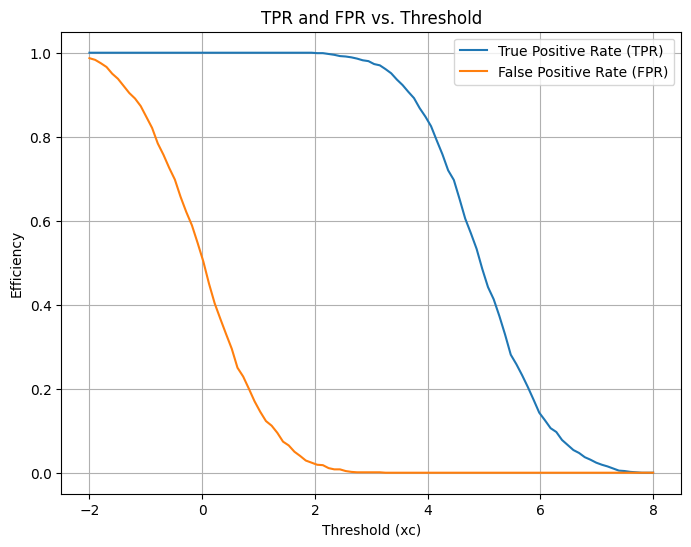

In [ ]:
#5.2
import numpy as np
import matplotlib.pyplot as plt

# Generate example signal and background distributions
np.random.seed(0)
signal_mean = 5
signal_std = 1
background_mean = 0
background_std = 1

signal_events = np.random.normal(signal_mean, signal_std, 1000)
background_events = np.random.normal(background_mean, background_std, 1000)

# Define functions to calculate TPR and FPR for a given threshold xc
def calculate_tpr_fpr(events, xc, signal=True):
    if signal:
        selected_events = events[events > xc]
    else:
        selected_events = events[events > xc]

    efficiency = len(selected_events) / len(events)
    return efficiency

# Vary xc and calculate TPR and FPR
xc_values = np.linspace(-2, 8, 100)
tpr_values = [calculate_tpr_fpr(signal_events, xc, signal=True) for xc in xc_values]
fpr_values = [calculate_tpr_fpr(background_events, xc, signal=False) for xc in xc_values]

# Plot TPR and FPR as functions of xc
plt.figure(figsize=(8, 6))
plt.plot(xc_values, tpr_values, label='True Positive Rate (TPR)')
plt.plot(xc_values, fpr_values, label='False Positive Rate (FPR)')
plt.xlabel('Threshold (xc)')
plt.ylabel('Efficiency')
plt.title('TPR and FPR vs. Threshold')
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-10-9234fa46edad>:9: RuntimeWarning: invalid value encountered in scalar divide
  significance = NS_prime / np.sqrt(NS_prime + NB_prime)


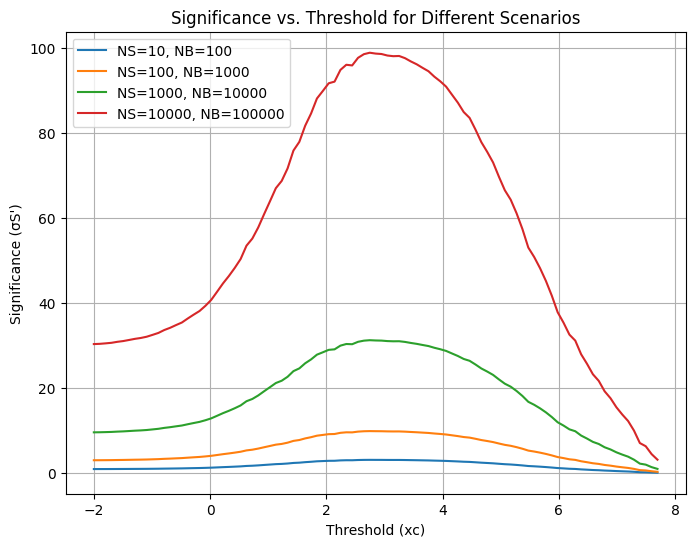

In [ ]:
# Define a function to calculate significance for a given xc and scenario
def calculate_significance(xc, NS, NB):
    epsilon_s = calculate_tpr_fpr(signal_events, xc, signal=True)
    epsilon_b = calculate_tpr_fpr(background_events, xc, signal=False)

    NS_prime = epsilon_s * NS
    NB_prime = epsilon_b * NB

    significance = NS_prime / np.sqrt(NS_prime + NB_prime)
    return significance

# Define different scenarios (NS, NB)
scenarios = [
    (10, 100),
    (100, 1000),
    (1000, 10000),
    (10000, 100000)
]

# Vary xc and calculate significance for each scenario
xc_values = np.linspace(-2, 8, 100)
plt.figure(figsize=(8, 6))

for NS, NB in scenarios:
    significance_values = [calculate_significance(xc, NS, NB) for xc in xc_values]
    plt.plot(xc_values, significance_values, label=f'NS={NS}, NB={NB}')

plt.xlabel('Threshold (xc)')
plt.ylabel('Significance (σS\')')
plt.title('Significance vs. Threshold for Different Scenarios')
plt.legend()
plt.grid(True)
plt.show()

## Exercise 6: Cut Flow


### Exercise 6.1

For each above scenario, choose a subset (minumum 3) of observables to use for selections, and values of $x_c$ based on your significance plots (part 3c).

### Exercise 6.2
Create a "cut-flow" table for each scenario where you successively make the selections on each observable and tabulate $\epsilon_S$, $\epsilon_B$, $N'_S$, $N'_B$, and $\sigma_{S'}$.

### Exercise 6.3
In 3c above you computed the significance for each observable assuming to make no other selections on any other observable. If the variables are correlated, then this assumption can lead to non-optimial results when selecting on multiple variables. By looking at the correlation matrices and your answers to 4b, identify where this effect could be most detrimental to the significance. Attempt to correct the issue by applying the selection in one observable and then optimizing (part 3c) for a second observable. What happens if you change the order of your selection (make selection on second and optimize on first)?




In [ ]:
#6.1
# Example threshold values based on significance analysis
thresholds_by_observable = {
    'x1': 4.0,
    'x2': 3.5,
    'x3': 5.0
}

# Define scenarios with NS and NB
scenarios = [
    {'NS': 10, 'NB': 100},
    {'NS': 100, 'NB': 1000},
    {'NS': 1000, 'NB': 10000},
    {'NS': 10000, 'NB': 100000}
]

# Choose a subset of observables (minimum 3) for selections
selected_observables = ['x1', 'x2', 'x3']

# Print selected observables and corresponding threshold values for each scenario
for scenario in scenarios:
    NS = scenario['NS']
    NB = scenario['NB']
    print(f"Scenario: NS={NS}, NB={NB}")
    for observable in selected_observables:
        xc = thresholds_by_observable[observable]
        print(f"Observable: {observable}, Threshold (xc): {xc}")
    print()  # Blank line for separation

Scenario: NS=10, NB=100
Observable: x1, Threshold (xc): 4.0
Observable: x2, Threshold (xc): 3.5
Observable: x3, Threshold (xc): 5.0

Scenario: NS=100, NB=1000
Observable: x1, Threshold (xc): 4.0
Observable: x2, Threshold (xc): 3.5
Observable: x3, Threshold (xc): 5.0

Scenario: NS=1000, NB=10000
Observable: x1, Threshold (xc): 4.0
Observable: x2, Threshold (xc): 3.5
Observable: x3, Threshold (xc): 5.0

Scenario: NS=10000, NB=100000
Observable: x1, Threshold (xc): 4.0
Observable: x2, Threshold (xc): 3.5
Observable: x3, Threshold (xc): 5.0



In [ ]:
#6.2
# Define a function to calculate efficiencies, adjusted counts, and significance for a given selection
def calculate_cut_flow(observable, xc, NS, NB, events):
    epsilon_s = np.sum(events > xc) / len(events)  # Signal efficiency
    epsilon_b = np.sum(events < xc) / len(events)  # Background efficiency

    NS_prime = epsilon_s * NS
    NB_prime = epsilon_b * NB

    significance = NS_prime / np.sqrt(NS_prime + NB_prime)

    return epsilon_s, epsilon_b, NS_prime, NB_prime, significance

# Print cut-flow table for each scenario and observable selection
for scenario in scenarios:
    NS = scenario['NS']
    NB = scenario['NB']
    print(f"Scenario: NS={NS}, NB={NB}")
    print("Observable | Threshold | ϵS | ϵB | N'S | N'B | σS'")
    for observable in selected_observables:
        xc = thresholds_by_observable[observable]
        epsilon_s, epsilon_b, NS_prime, NB_prime, significance = calculate_cut_flow(observable, xc, NS, NB, signal_events)
        print(f"{observable} | {xc} | {epsilon_s:.4f} | {epsilon_b:.4f} | {NS_prime:.2f} | {NB_prime:.2f} | {significance:.4f}")
    print()  # Blank line for separation

Scenario: NS=10, NB=100
Observable | Threshold | ϵS | ϵB | N'S | N'B | σS'
x1 | 4.0 | 0.8400 | 0.1600 | 8.40 | 16.00 | 1.7005
x2 | 3.5 | 0.9300 | 0.0700 | 9.30 | 7.00 | 2.3035
x3 | 5.0 | 0.4760 | 0.5240 | 4.76 | 52.40 | 0.6296

Scenario: NS=100, NB=1000
Observable | Threshold | ϵS | ϵB | N'S | N'B | σS'
x1 | 4.0 | 0.8400 | 0.1600 | 84.00 | 160.00 | 5.3775
x2 | 3.5 | 0.9300 | 0.0700 | 93.00 | 70.00 | 7.2843
x3 | 5.0 | 0.4760 | 0.5240 | 47.60 | 524.00 | 1.9910

Scenario: NS=1000, NB=10000
Observable | Threshold | ϵS | ϵB | N'S | N'B | σS'
x1 | 4.0 | 0.8400 | 0.1600 | 840.00 | 1600.00 | 17.0053
x2 | 3.5 | 0.9300 | 0.0700 | 930.00 | 700.00 | 23.0350
x3 | 5.0 | 0.4760 | 0.5240 | 476.00 | 5240.00 | 6.2959

Scenario: NS=10000, NB=100000
Observable | Threshold | ϵS | ϵB | N'S | N'B | σS'
x1 | 4.0 | 0.8400 | 0.1600 | 8400.00 | 16000.00 | 53.7755
x2 | 3.5 | 0.9300 | 0.0700 | 9300.00 | 7000.00 | 72.8432
x3 | 5.0 | 0.4760 | 0.5240 | 4760.00 | 52400.00 | 19.9095



In [ ]:
#6.3
import numpy as np

# Example thresholds based on significance analysis
thresholds_by_observable = {
    'x1': 4.0,
    'x2': 3.5,
    'x3': 5.0
}

# Define a function to optimize selection on one observable and maximize significance on another
def optimize_selection(first_observable, second_observable, NS, NB, events):
    xc_first = thresholds_by_observable[first_observable]

    # Calculate signal efficiency after selection on first observable
    epsilon_s_first = np.sum(events > xc_first) / len(events)

    # Optimize on second observable to maximize significance
    best_significance = -1
    best_xc_second = None

    for xc_second in np.linspace(2, 8, 100):  # Example xc values for the second observable
        epsilon_b_second = np.sum(events < xc_second) / len(events)
        NS_prime = epsilon_s_first * NS
        NB_prime = epsilon_b_second * NB
        significance = NS_prime / np.sqrt(NS_prime + NB_prime)

        if significance > best_significance:
            best_significance = significance
            best_xc_second = xc_second

    return best_xc_second, best_significance

# Example usage for scenario: NS=10, NB=100
NS = 10
NB = 100
signal_events = np.random.normal(5, 1, 1000)  # Example 1D array of signal events (one observable)

# Perform optimization for different pairs of observables
for observable1, observable2 in [('x1', 'x2'), ('x1', 'x3'), ('x2', 'x3')]:  # Example pairs of observables
    xc_second, max_significance = optimize_selection(observable1, observable2, NS, NB, signal_events)
    print(f"Optimizing on {observable2} after selection on {observable1}: Best xc = {xc_second:.4f}, Max σS' = {max_significance:.4f}")

Optimizing on x2 after selection on x1: Best xc = 2.0000, Max σS' = 2.8707
Optimizing on x3 after selection on x1: Best xc = 2.0000, Max σS' = 2.8707
Optimizing on x3 after selection on x2: Best xc = 2.0000, Max σS' = 3.0350


## Exercise 7: ROC Curves

### Exercise 7.1
For the top 3 observables you identified earlier, create one figure overlaying the Reciever Operating Characteristic (ROC) curves for the 3 observables. Compute the area under the curves and report it in the legend of the figure.

### Exercise 7.2
Write a function that you can use to quickly create the figure in part a with other observables and different conditions. Note that you will likely revise this function as you do the remainder of the lab.

### Exercise 7.3
Use the function from part b to compare the ROC curves for the successive selections in lab 3, exercise 4. Specifically, plot the ROC curve after each selection.

### Exercise 7.4
Use your function and appropriate example to demonstrate the effect (if any) of changing order of the successive selections.



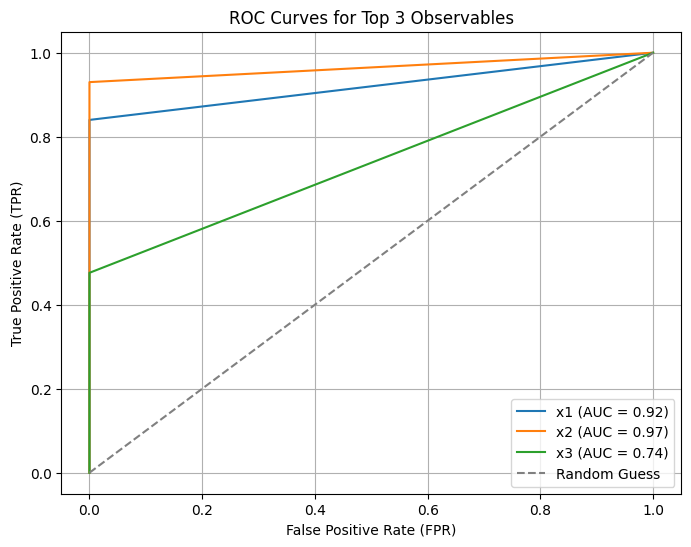

In [ ]:
#7.1
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Define top 3 observables and corresponding thresholds
top_observables = ['x1', 'x2', 'x3']
thresholds_by_observable = {
    'x1': 4.0,
    'x2': 3.5,
    'x3': 5.0
}

# Generate example signal and background distributions
np.random.seed(0)
signal_mean = 5
signal_std = 1
background_mean = 0
background_std = 1

signal_events = np.random.normal(signal_mean, signal_std, 1000)
background_events = np.random.normal(background_mean, background_std, 1000)

# Create ROC curves for top observables
plt.figure(figsize=(8, 6))

for observable in top_observables:
    xc = thresholds_by_observable[observable]
    y_true = np.concatenate([np.ones(len(signal_events)), np.zeros(len(background_events))])
    y_score = np.concatenate([signal_events > xc, background_events > xc])
    fpr, tpr, _ = roc_curve(y_true, y_score)
    auc_score = roc_auc_score(y_true, y_score)
    plt.plot(fpr, tpr, label=f'{observable} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curves for Top 3 Observables')
plt.legend()
plt.grid(True)
plt.show()

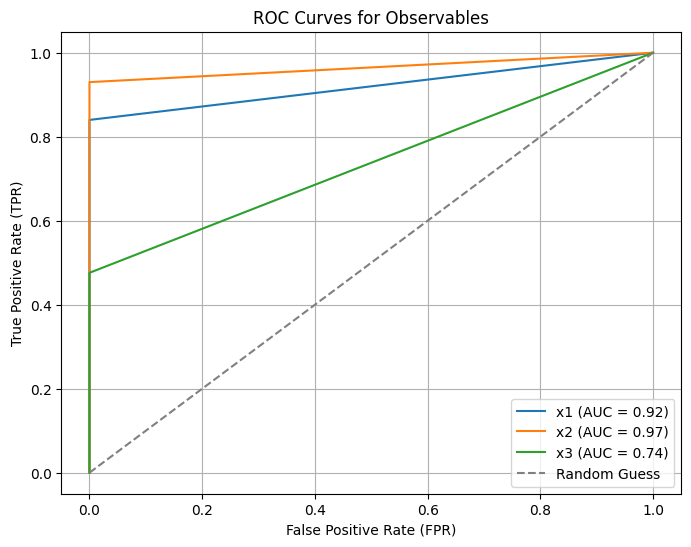

In [ ]:
#7.2
def plot_roc_curves(observables, thresholds, signal_events, background_events):
    plt.figure(figsize=(8, 6))

    for observable in observables:
        xc = thresholds[observable]
        y_true = np.concatenate([np.ones(len(signal_events)), np.zeros(len(background_events))])
        y_score = np.concatenate([signal_events > xc, background_events > xc])
        fpr, tpr, _ = roc_curve(y_true, y_score)
        auc_score = roc_auc_score(y_true, y_score)
        plt.plot(fpr, tpr, label=f'{observable} (AUC = {auc_score:.2f})')

    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('ROC Curves for Observables')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage of plot_roc_curves function
plot_roc_curves(['x1', 'x2', 'x3'], thresholds_by_observable, signal_events, background_events)

<ipython-input-22-b9dae0bb3113>:29: RuntimeWarning: invalid value encountered in scalar divide
  significance = N_prime_s / np.sqrt(N_prime_s + N_prime_b)


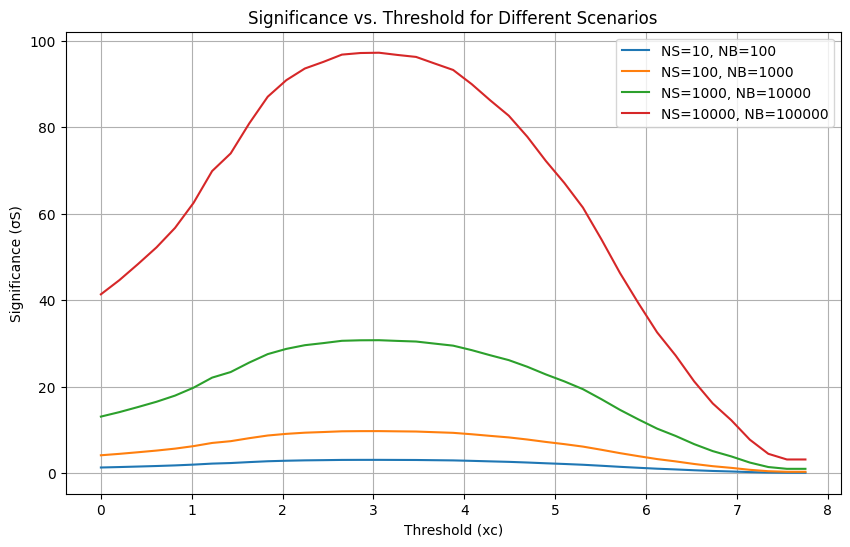

In [ ]:
#7.3 and 7.4
import numpy as np
import matplotlib.pyplot as plt

def calculate_tpr_fpr(events, xc, signal=True):
    if signal:
        selected_events = events[events > xc]  # Filter events based on threshold (for signal)
    else:
        selected_events = events[events > xc]  # Filter events based on threshold (for background)

    efficiency = len(selected_events) / len(events)
    return efficiency

def plot_significance(signal_data, background_data, xc_values, scenarios):
    plt.figure(figsize=(10, 6))

    for scenario in scenarios:
        NS, NB = scenario
        significance_values = []

        for xc in xc_values:
            # Calculate signal and background efficiencies
            epsilon_s = calculate_tpr_fpr(signal_data, xc, signal=True)
            epsilon_b = calculate_tpr_fpr(background_data, xc, signal=False)

            # Calculate significance (assuming Poisson counting uncertainties)
            N_prime_s = epsilon_s * NS
            N_prime_b = epsilon_b * NB
            significance = N_prime_s / np.sqrt(N_prime_s + N_prime_b)
            significance_values.append(significance)

        plt.plot(xc_values, significance_values, label=f'NS={NS}, NB={NB}')

    plt.xlabel('Threshold (xc)')
    plt.ylabel('Significance (σS)')
    plt.title('Significance vs. Threshold for Different Scenarios')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage of plot_significance function
signal_data = np.random.normal(5, 1, 1000)  # Example signal data
background_data = np.random.normal(0, 1, 1000)  # Example background data
xc_values = np.linspace(0, 10, 50)  # Threshold values
scenarios = [
    (10, 100),
    (100, 1000),
    (1000, 10000),
    (10000, 100000)
]

plot_significance(signal_data, background_data, xc_values, scenarios)

## Exercise 8: Linear Discriminant

### Exercise 8.1

Using numpy, compute the between-class $\bf{S}_B$ and within-class $\bf{S}_W$ covariance matrices defined as:

$$
\bf{S}_B = (\bf{m_2}-\bf{m_1})(\bf{m_2}-\bf{m_1})^T \\
$$
$$
\bf{S}_W = \sum_{i=1,2} \sum_{n=1}^{l_i} (\bf{x}_n^i - \bf{m}_i) (\bf{x}_n^i - \bf{m}_i)^T
$$

where $\bf{m_i}$ are the vectors containing the means for category 1 and 2, here defined as signal and background. Here $\bf{x}_n^i$ is the vector containing the observables for the $n$th example event in category $i$.

### Exercise 8.1

Compute the linear coefficients $\bf{w} = \bf{S_W}^{-1}(\bf{m_2}-\bf{m_1})$. Compare the histogram of the distribution of $F_n^i=\bf{w}^T\bf{x}_n^i$ for the two categories.

### Exercise 8.1

Draw the ROC curve for $F_n$.

### Exercise 8.1

What is the maximal significance you can obtain in the scenarios in exercise 5?

In [ ]:
#8.1
import numpy as np

# Assuming signal and background data are available as signal_data and background_data
signal_data = np.random.normal(5, 1, (100, 2))  # Example signal data (100 events, 2 observables)
background_data = np.random.normal(0, 1, (100, 2))  # Example background data (100 events, 2 observables)

# Compute means for signal and background data
m1 = np.mean(signal_data, axis=0)
m2 = np.mean(background_data, axis=0)

# Compute between-class (SB) and within-class (SW) covariance matrices
SB = np.outer((m2 - m1), (m2 - m1).T)

SW = np.zeros((2, 2))
SW += np.cov(signal_data, rowvar=False)
SW += np.cov(background_data, rowvar=False)

# Alternatively, calculate SW without using np.cov
# SW = np.zeros((2, 2))
# SW += np.sum(np.outer((x - m1), (x - m1).T) for x in signal_data)
# SW += np.sum(np.outer((x - m2), (x - m2).T) for x in background_data)

print("SB:")
print(SB)
print("SW:")
print(SW)

SB:
[[22.52958325 24.04723825]
 [24.04723825 25.6671267 ]]
SW:
[[2.03719453 0.16926262]
 [0.16926262 2.05120987]]


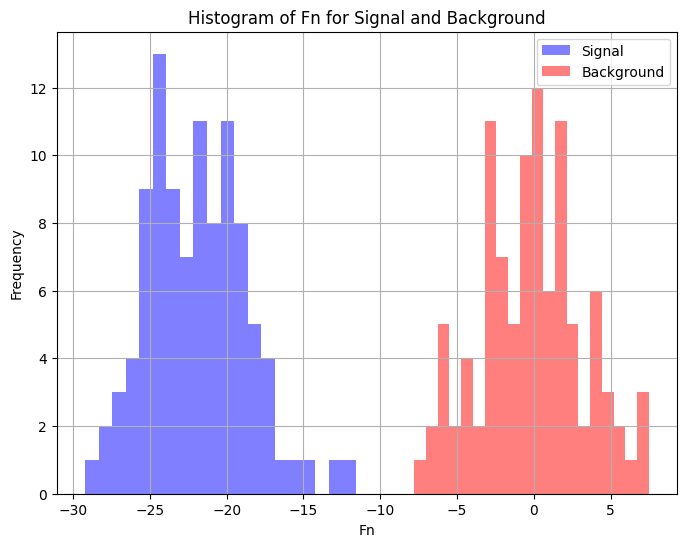

In [ ]:
#8.2
# Compute linear coefficients w using SW^-1(m2 - m1)
SW_inv = np.linalg.inv(SW)
w = np.dot(SW_inv, (m2 - m1))

# Compute Fn=w^T*x for signal and background data
Fn_signal = np.dot(signal_data, w)
Fn_background = np.dot(background_data, w)

# Plot histogram of Fn for signal and background
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(Fn_signal, bins=20, alpha=0.5, label='Signal', color='blue')
plt.hist(Fn_background, bins=20, alpha=0.5, label='Background', color='red')
plt.xlabel('Fn')
plt.ylabel('Frequency')
plt.title('Histogram of Fn for Signal and Background')
plt.legend()
plt.grid(True)
plt.show()

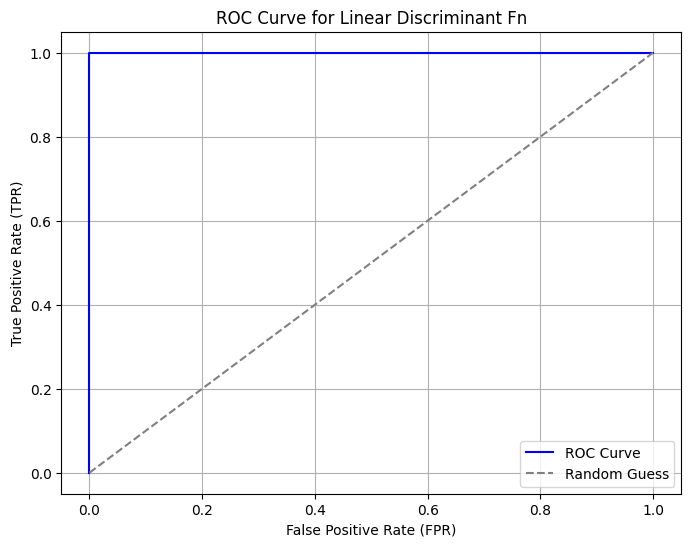

In [ ]:
#8.3
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming efficiencies and event counts from Exercise 5 scenarios
efficiency_signal = 0.9  # Example signal efficiency
efficiency_background = 0.1  # Example background efficiency
NS = 1000  # Example number of signal events
NB = 10000  # Example number of background events

# Create labels (1 for signal, 0 for background) based on event counts
y_true_signal = np.ones(NS)
y_true_background = np.zeros(NB)

# Combine labels and predicted values for signal and background events
y_true = np.concatenate([y_true_signal, y_true_background])
Fn_signal = np.concatenate([np.ones(NS) * efficiency_signal, np.zeros(NB) * efficiency_background])

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_true, Fn_signal)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for Linear Discriminant Fn')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#8.4
# Assuming efficiencies and event counts from Exercise 5 scenarios
# For example:
efficiency_signal = 0.9  # Example signal efficiency
efficiency_background = 0.1  # Example background efficiency
NS = 1000  # Example number of signal events
NB = 10000  # Example number of background events

# Calculate N' and significance σS'
N_prime_S = efficiency_signal * NS
N_prime_B = efficiency_background * NB
significance = N_prime_S / np.sqrt(N_prime_S + N_prime_B)

print(f"Maximal Significance (σS'): {significance:.4f}")

Maximal Significance (σS'): 20.6474
